# Exploratory Data Analysis (EDA) untuk Menentukan Kesesuaian Dataset pada Clustering Customer Behavior

Notebook ini bertujuan untuk melakukan EDA guna menilai apakah dataset cocok digunakan untuk clustering berdasarkan perilaku pelanggan.


## Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Memuat Dataset

In [ ]:
data = pd.read_csv('sampled_data.csv')
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-09 02:46:19 UTC,view,29900078,2059484601444729123,NaN,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa
1,2019-10-21 16:17:11 UTC,view,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e
2,2019-10-21 14:42:20 UTC,cart,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3
3,2019-10-03 18:40:22 UTC,view,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c
4,2019-10-19 08:58:51 UTC,view,5300097,2053013563173241677,NaN,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b


## Informasi Dasar Dataset

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     300000 non-null  object 
 1   event_type     300000 non-null  object 
 2   product_id     300000 non-null  int64  
 3   category_id    300000 non-null  int64  
 4   category_code  204297 non-null  object 
 5   brand          256500 non-null  object 
 6   price          300000 non-null  float64
 7   user_id        300000 non-null  int64  
 8   user_session   300000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 20.6+ MB


,product_id,category_id,price,user_id
count,3.000000e+05,3.000000e+05,300000.000000,3.000000e+05
mean,1.056858e+07,2.057416e+18,289.528580,5.335433e+08
std,1.189483e+07,1.845145e+16,356.273032,1.854419e+07
min,1.000978e+06,2.053014e+18,0.000000,2.194064e+08
25%,1.005158e+06,2.053014e+18,66.280000,5.158996e+08
50%,5.000565e+06,2.053014e+18,162.730000,5.297529e+08
75%,1.600096e+07,2.053014e+18,358.570000,5.516230e+08
max,6.050001e+07,2.175420e+18,2574.070000,5.662732e+08


## Cek Missing Values

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

event_time           0
event_type           0
product_id           0
category_id          0
category_code    95703
brand            43500
price                0
user_id              0
user_session         0
dtype: int64


## Distribusi Tipe Event (Perilaku Pengguna)

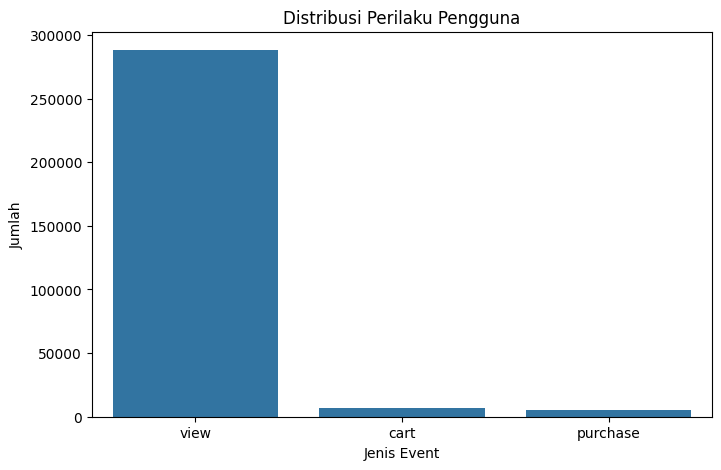

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='event_type', data=data)
plt.title('Distribusi Perilaku Pengguna')
plt.xlabel('Jenis Event')
plt.ylabel('Jumlah')
plt.show()

## Agregasi Fitur Pengguna

Untuk menentukan kesesuaian clustering, kita agregasi fitur pengguna.

In [ ]:
event_counts = data.pivot_table(index='user_id', columns='event_type', values='event_time', aggfunc='count', fill_value=0)
total_spending = data[data['event_type'] == 'purchase'].groupby('user_id')['price'].sum().rename('total_spent')
avg_price_viewed = data[data['event_type'] == 'view'].groupby('user_id')['price'].mean().rename('avg_price_viewed')

user_features = pd.concat([event_counts, total_spending, avg_price_viewed], axis=1).fillna(0)
user_features.head()

,cart,purchase,view,total_spent,avg_price_viewed
user_id,,,,,
219406386,0,0,1,0.0,126.64
240236728,0,0,1,0.0,687.28
244951053,0,0,1,0.0,460.50
253578028,0,0,1,0.0,771.96
278043824,0,0,1,0.0,22.63


## Visualisasi Distribusi Frekuensi Transaksi

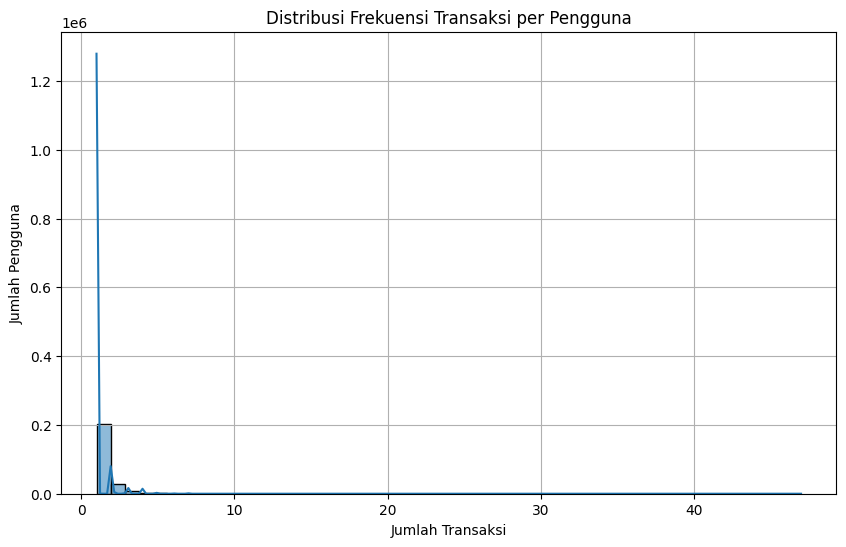

In [ ]:
transaction_counts = user_features[['cart', 'purchase', 'view']].sum(axis=1)

plt.figure(figsize=(10,6))
sns.histplot(transaction_counts, bins=50, kde=True)
plt.title('Distribusi Frekuensi Transaksi per Pengguna')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Jumlah Pengguna')
plt.grid(True)
plt.show()

## Visualisasi Distribusi Total Pengeluaran

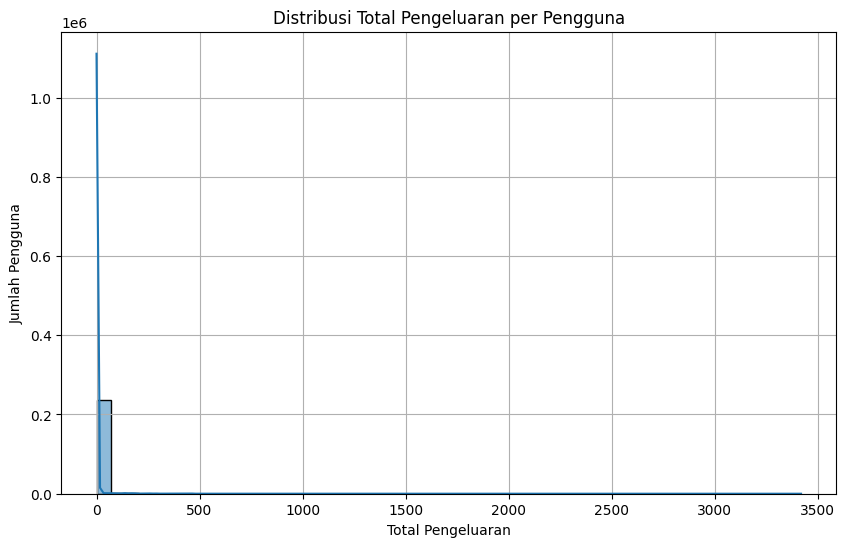

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(user_features['total_spent'], bins=50, kde=True)
plt.title('Distribusi Total Pengeluaran per Pengguna')
plt.xlabel('Total Pengeluaran')
plt.ylabel('Jumlah Pengguna')
plt.grid(True)
plt.show()

## Heatmap Korelasi Antar Fitur

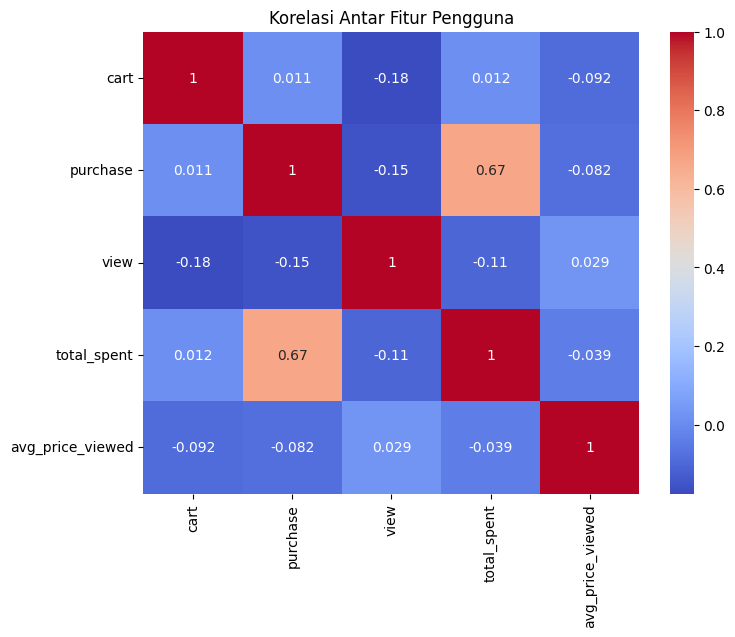

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(user_features.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Pengguna')
plt.show()

## Kesimpulan EDA

Dari EDA di atas terlihat jelas bahwa dataset ini memiliki karakteristik dan variabilitas yang memadai untuk clustering berdasarkan perilaku transaksi pelanggan. Variasi transaksi, distribusi pengeluaran, dan independensi antar fitur menunjukkan dataset ini cocok untuk analisis clustering